In [1]:
import sys
sys.path.insert(1, '../')

from StyleTransferDataset import StyleTransferDataset
import StyleTransferTrain
from matplotlib import pyplot as plt

In [2]:
image_dir = '../Images/'


In [3]:
num_epochs = 50

In [4]:
dataset = StyleTransferDataset(img_dir=image_dir)

In [5]:
d = dataset[0]

### Effect of Initialization  - The below three cell displays three output images for Random Initialization, Initialization with Content Image and Initialization with Style Image Respectively. 

50 Completed


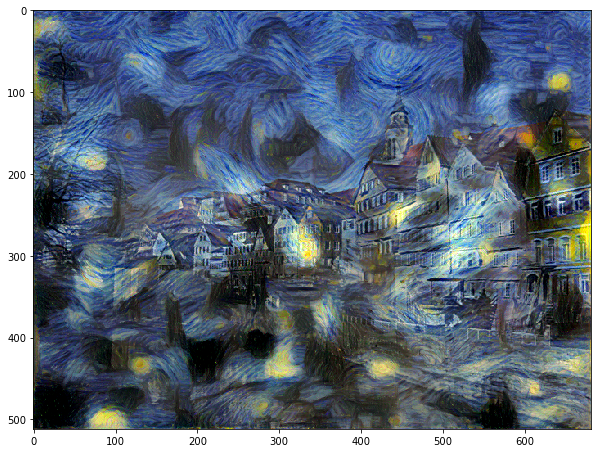

In [6]:
# configure layers & weights
style_layers = ['r11','r21','r31','r41'] 
content_layers = ['r11']

## Configure Weights
style_weights = [1e3/n**2 for n in [64,128,256,512]]
content_weights = [1e0]

output = StyleTransferTrain.train(d, style_layers, content_layers, style_weights, content_weights, num_epochs)

fig = plt.figure(figsize=(10, 10))
plt.imshow(output)

In [7]:
dataset = StyleTransferDataset(img_dir=image_dir, init='Content')

In [8]:
d = dataset[0]

50 Completed


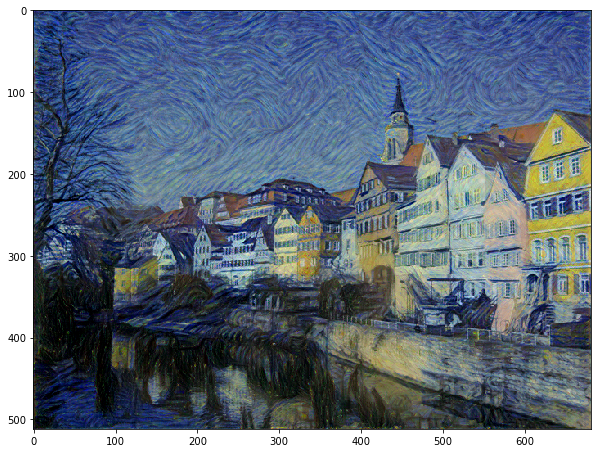

In [9]:
output2 = StyleTransferTrain.train(d, style_layers, content_layers, style_weights, content_weights, num_epochs)

fig = plt.figure(figsize=(10, 10))
plt.imshow(output2)

In [10]:
dataset = StyleTransferDataset(img_dir=image_dir, init='Style', img_size=(512,512))
d = dataset[0]

50 Completed


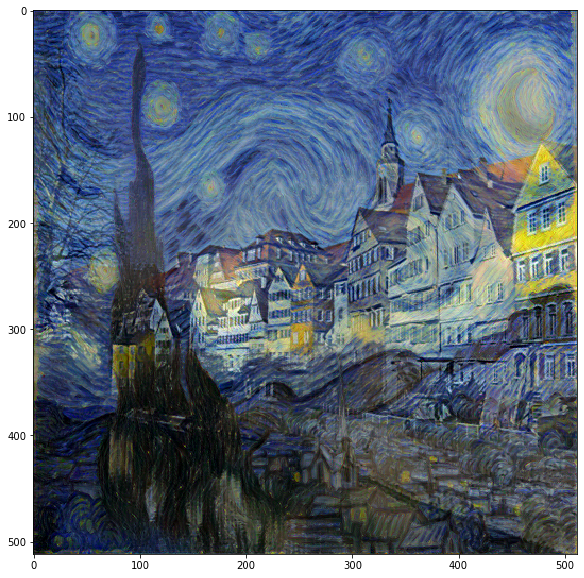

In [11]:
output3 = StyleTransferTrain.train(d, style_layers, content_layers, style_weights, content_weights, num_epochs)

fig = plt.figure(figsize=(10, 10))
plt.imshow(output3)

In [12]:
d[2].shape


torch.Size([1, 3, 512, 512])

In [13]:
d[3].shape

torch.Size([1, 3, 512, 512])

In [14]:
d[4].shape

torch.Size([1, 3, 512, 512])

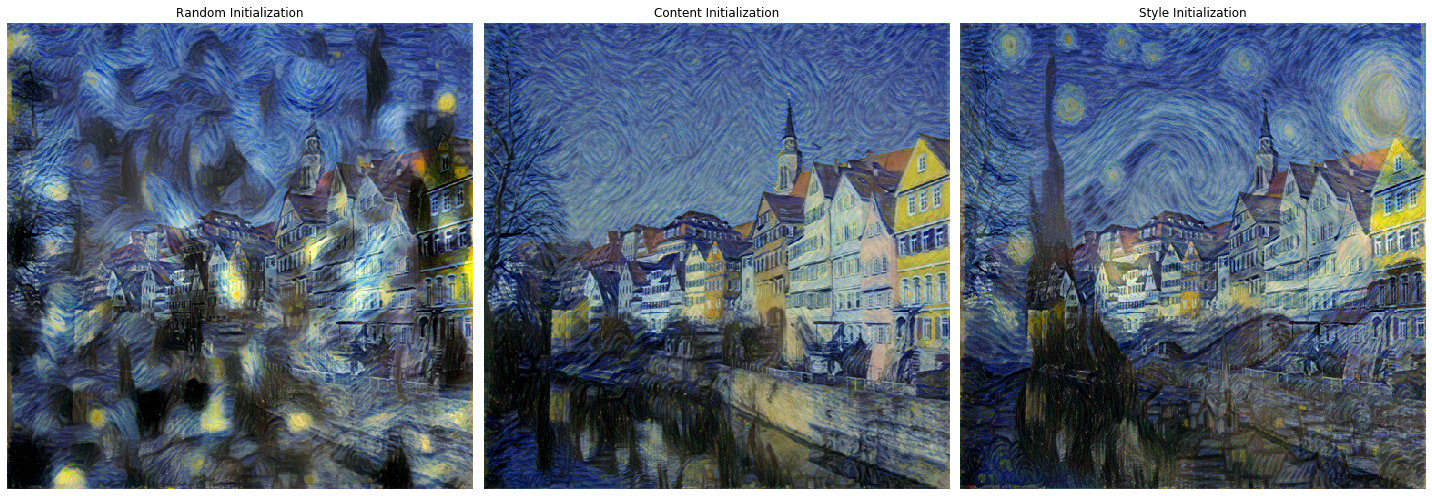

In [17]:
import torchvision as tv

transform = tv.transforms.Resize((512,512))

def imshow(axis, image, title):
    axis.axis('off')
    axis.set_title(title)
    axis.imshow(transform(image))
    

fig, axs = plt.subplots(figsize=(20, 10), ncols=3, nrows=1)
imshow(axs[0],output, 'Random Initialization')
imshow(axs[1],output2, 'Content Initialization')
imshow(axs[2],output3, 'Style Initialization')    
plt.tight_layout()
plt.savefig('init.png', bbox_inches='tight')
